**Вітаю! У цьому проєкті розглянуті дані файлу Grocery Database.xlsx та проведено їх аналіз. Зміст ноутбуку пропонує зручну навігацію у відповідності до питань, що були поставлені з огляду на специфіку даних.**

**Перед безпосередньою роботою з даними було проведено їх попередню обробку та чистку, щоб запобігти виникненню похибок та, як результату, невірних висновків та рекомендацій.**

## Імпортування бібліотек та читання файлу

### Імпортування бібліотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")

from scipy.stats import pearsonr
from statsmodels.stats.weightstats import ztest

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 200)

Читати дані можна як з допомогою і з допомогою бібліотеки openpyxl, так і з Pandas, але в останньому випадку немає можливості переглянути наявні листки, а також довше відбувається читання даних.

### Читання файлу з openpyxl

In [2]:
!pip install openpyxl

In [3]:
path_to_file = 'Grocery Database.xlsx'

Можемо переглянути, які є листки у файлі.

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

Або отримати доступ до одного конкретного листка.

In [5]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


### Читання файлу з Pandas

In [6]:
df = pd.read_excel(path_to_file)

## Попередня обробка даних

### Загальна інформація про дані

Подивимося спочатку на данні - як вони виглядають та які типи даних ми маємо у нашому наборі. 

In [7]:
df.shape

(50447, 32)

Бачимо, що набір містить 50447 рядків та 32 колонки. 

Переглянемо перші три записи з набору, а після цього - загальну інформацію щодо типів даних у кожній колонці, кількісті кожного типу даних у наборі та пам'яті, яку займає набір.

In [8]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

Метод `.info` у деякому сенсі є альтернативою виклику `.shape` з точки зору отримання інформації про кількість рядків та колонок, але надає і більш повну інформацію про кожну колонку (у тому числі і про пропущенні дані).

### Корекція назв колонок

Під час виклику різних колонок виявилось, що це неможливо зробити для колонок Description та Brand, хоча вони є у файлі та у переліку вище. Тому виникає думка про те, що треба перевірити список колонок у наборі даних.

In [10]:
df.columns

Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')

Бачимо, що помилку викликає пробіл після назви, який для зручності можна видалити. 

In [11]:
df.rename(columns={'Description ': 'Description', 'Brand ': 'Brand'}, inplace=True)

### Перевірка на пропущені данні

Далі цікаво подивитися на пропущенні значення: чи є вони і де саме. На щастя, в цьому датафреймі їх немає.

In [12]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

### Перетворення типів даних

Переглянемо уважніше типи даних.

In [13]:
df.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

Бачимо, що типи даних певних колонок не відповідають контексту.Де це можливо - змінемо типи на ті, що більше підходять.

* Тип даних Catergorical - колонки `Gender`, `Country`, `Payment Mode`

In [14]:
columns = ['Gender', 'Country', 'Payment Mode']

for col in columns:
    df[col] = pd.Categorical(df[col])

* Тип даних str - колонка `Mobile Number`

In [15]:
df['Mobile Number'].astype('str')

0        9793548581
1        9938441276
2        9976742552
3        9976742552
4        9976742552
            ...    
50442    9893317658
50443    9809301701
50444    9840124138
50445    9840124138
50446    9840124138
Name: Mobile Number, Length: 50447, dtype: object

* Тип даних datetime64[ns] - колонка `Time`

Тут буде не просте перетворення типу даних, а створення окремої колонки з повною інформацією про дату та час покупки. Це надасть більше гнучкості при подальшому аналізі особливостей, пов'язаних з time series.

In [16]:
df['Recorded_time'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
df['Recorded_time'] = df['Recorded_time'].astype('datetime64[ns]')

In [17]:
df.Recorded_time

0       2016-01-02 10:08:03.260
1       2016-01-02 15:46:50.832
2       2016-01-02 11:28:52.166
3       2016-01-02 11:28:52.166
4       2016-01-02 11:28:52.166
                  ...          
50442   2019-12-28 20:59:27.302
50443   2019-12-29 13:14:45.030
50444   2019-12-30 10:01:32.657
50445   2019-12-30 10:01:32.657
50446   2019-12-30 10:01:32.657
Name: Recorded_time, Length: 50447, dtype: datetime64[ns]

### Перевірка коректності наведених даних

При уважному погляді на дані можна відмітити, що `Net Bill Amount` та `Gross Bill Amount` розраховані не окремо для кожної позиції, а для всього рахунку одразу. Перевіремо коректність значень цих двох колонок на одному з рахунків, який містить декілька позицій.

* Фактичний розрахунок за сумою усіх позицій у рахунку.

In [18]:
df[df['Receipt Number'] == 'GIJ00003'].Amount.sum() 

30.769199999999998

* Значення для рахунку з колонки `Net Bill Amount`.

In [19]:
df[df['Receipt Number'] == 'GIJ00003']['Net Bill Amount'].iloc[0]

38.3526

Отже, бачимо, що значення не збігаються. Це вказує на те, що необхідно провести перерахунок у згаданих вище колонках. 

**Зауваження.** *Забігаючи наперед, зазначу, що у подальшому при аналізі будуть використовуватися перераховані колонки, у яких значення відповідають кожній окремій позиції, а не сумі за весь чек.*

In [20]:
df['Corrected Net Bill Amount'] = df.Price * df.QTY *(1-df.DISC)

In [21]:
df['Corrected Gross Bill Amount'] = df['Corrected Net Bill Amount'] * (1 + df.GST)

Подивимось, чи збігаються тепер наша перерахована колонка та колонка `Amount`.

In [22]:
df[['Amount', 'Corrected Net Bill Amount']].head()

,Amount,Corrected Net Bill Amount
0,12.1128,12.1128
1,22.9680,22.9680
2,13.1769,13.1769
3,3.4848,3.4848
4,4.3659,4.3659


Цікаво, що викликало помилку. Спробуємо розглянути кілька гіпотез.

* Помилка у формулі.

In [23]:
price = df[df['Receipt Number'] == 'GIJ00003'].Price
qty = df[df['Receipt Number'] == 'GIJ00003'].QTY
disc = df[df['Receipt Number'] == 'GIJ00003'].DISC
amount = price * qty * (1+disc) #у третьому множнику замінюємо '-' на '+' 

In [24]:
amount.sum()

31.390800000000002

Це значення не відповідає тому, що є для цього рахунку у колонці `Net Bill Amount`. Шукаємо помилку далі.

* Невірна агрегація.

Малоімовірна помилка, але спробуємо перевірити.

In [25]:
price = df[df['Receipt Number'] == 'GIJ00003'].Price.sum()
qty = df[df['Receipt Number'] == 'GIJ00003'].QTY.sum()
disc = df[df['Receipt Number'] == 'GIJ00003'].DISC.sum()
amount = price * qty * (1-disc)

In [26]:
amount

175.2912

* Неврахування знижки.

In [27]:
price = df[df['Receipt Number'] == 'GIJ00003'].Price
qty = df[df['Receipt Number'] == 'GIJ00003'].QTY
amount = price * qty

In [28]:
amount.sum()

31.080000000000002

Жодна з запропонованих гіпотез не надала очікуваного результату. Вочевидь, помилку викликало дещо інше. В такому випадку, гарним кроком було б зв'язатися з особами, відповідальними за збір даних, щоб зібрати уточнюючу інформацію.

## Основна частина - аналіз даних на основі поставленних до них питань

### Поглянемо на зміни середнього чистої суми рахунку, що отримав клієнт, у залежності від віку клієнтів у різних країнах.

In [29]:
age_pivot = df.pivot_table(index='Age', columns='Country', values='Corrected Net Bill Amount')

In [30]:
age_pivot

Country,Indonesia,Malaysia,Philippines,Singapore
Age,,,,
15,10.786459,10.816283,11.473074,11.675638
16,9.335717,10.917567,10.543988,12.383020
17,12.047700,10.774646,10.120312,11.133565
18,11.732409,11.342231,11.374105,11.023192
19,11.642513,11.983177,11.409759,10.824732
20,10.630469,11.624563,11.813937,10.583368
21,11.538633,10.920315,10.153677,10.892022
22,11.426512,10.941061,10.294280,11.038389
23,10.364586,12.137778,9.949874,9.699329


Отже, ми маємо чотири країни, де відбувалися замовлення та покупки, та клієнти віком від 15 до 75 років.
Деякі елементи таблиці мають значення NaN. Подивимося, з чим це може бути пов'язано.

In [31]:
df[df.Age == 74][df.Country == 'Malaysia']['Corrected Net Bill Amount']

Series([], Name: Corrected Net Bill Amount, dtype: float64)

Для одного з записів у `age_pivot` відсутня інформація в оснвному наборі даних. Тобто пропущенні значення виникають через відсутність клієнтів зазначенного віку. Перевіримо, скільки ми маємо всього пропущенних значень у зведенній таблиці.

In [32]:
age_pivot.isna().sum()

Country
Indonesia      5
Malaysia       8
Philippines    6
Singapore      0
dtype: int64

Записів відносно небагато, тому пропоную замінити їх середнім значенням по кожній відподній країні.

In [33]:
country_list = age_pivot.columns.tolist()

for country in country_list:
    age_pivot[country].fillna(age_pivot[country].mean(), inplace=True)

Перевіримо наявність пропущенних даних ще раз, щоб запевнитись, що вони успішно замінені.

In [34]:
age_pivot.isna().sum()

Country
Indonesia      0
Malaysia       0
Philippines    0
Singapore      0
dtype: int64

А тепер цікаво подивитись, яким є розподіл Net Bill Amount для кожної країни у залежності від віку.

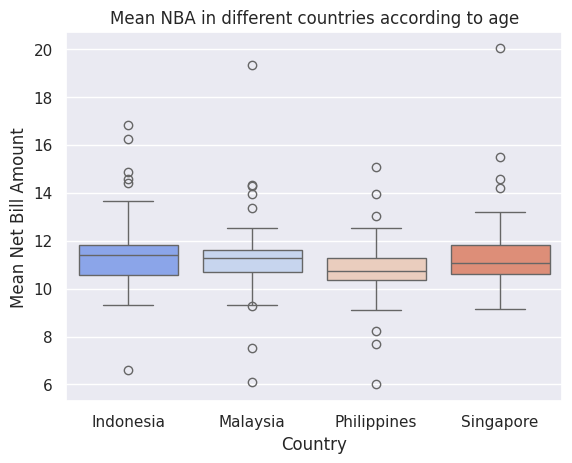

In [154]:
sns.set(style='darkgrid')
sns.boxplot(data=age_pivot, palette='coolwarm')

plt.ylabel('Mean Net Bill Amount')
plt.title('Mean NBA in different countries according to age');

Бачимо, що у всіх випадках ми маємо виброси у даних. Всі графіки значною мірою перетинаються та мають схоже значення медіани (близько 11). Це означає, що для всіх країн та обранного вікового діапазону (15-75 років) найбільш популярне середнє значення чистої суми рахунку було приблизно однаковим. Найбільший розкид даних демонструють Індонезія та Сінгапур (щільність групування даних менше, ніж у двох інших країн), окрім того боксплот для Індонезії є значно скошеним праворуч. Розкид може вказувати на те, що різні вікові категорії мали несхожі середні Net Bill Amount, тобто не мало місця скупчення даних коло одного значення (наприклад, медіани). Скошення вказує на те, що в Індозеї є тенденція до більших середніх чеків, в той час як у Малазії - навпаки (з огляду на нижнє та верхнє екстремальні значення).
Інші графіки також демонструють скошення, але меншою мірою. 

Тепер подивимося для різних країн середній профіт у залежності від категорії продукту. З наступної зведенної таблиці ми можемо побачити, у яких країних певна категорія має найвищий середній профіт, а у яких - найнижчій. Якщо припустити, що середній профіт за категорією може відображати попит на товари категорії (наприклад, якщо на товари цієї категорії у певних країнах/районах ажіотаж, то це теоретично може призвести до підвищення ціни - люди будуть купляти, не дивлячись на підняття ціни), то можна робити припущення про роботу з цільовою аудиторію або про ефективність рекламних кампаній, цінової політики, тощо. Цю таблицю цікаво аналізувати у поєднанні з іншими графіками, як наприклад з завдання 3.3.

In [36]:
categ_pivot = df.pivot_table(index='Country', columns='Category', values='Profit Margin', aggfunc='mean')

In [37]:
categ_pivot.style.background_gradient(axis=0)

Category,Bakery & Breakfast,Beauty,Beverages,"Choco, Snacks, Sweets","Dairy, Chilled & Eggs",Frozen,Fruit & Vegetable,Health,Household,Kitchen & Dining,Meat & Seafood,Mother & Baby,Party Supplies,Pet Care,Rice & Cooking Essentials,"Wines, Beers & Spirits"
Country,,,,,,,,,,,,,,,,
Indonesia,0.919685,1.512095,1.104250,0.945652,0.811724,1.449241,1.066450,1.629224,1.032993,0.649662,1.947370,2.108515,0.957872,1.325367,0.516283,2.074635
Malaysia,0.914548,1.536384,1.093283,0.951400,0.793948,1.488474,0.971446,1.787664,1.014506,0.621035,1.892377,2.009482,0.851430,1.283920,0.542632,2.219560
Philippines,0.911668,1.489601,1.069546,0.983540,0.762968,1.370833,0.974026,1.656379,0.898387,0.621176,1.931221,2.033098,0.866176,1.269399,0.512535,2.124855
Singapore,0.927536,1.577811,1.097755,1.010687,0.792684,1.477921,1.011448,1.880741,1.026962,0.635929,1.970494,2.096545,0.925132,1.286005,0.515416,2.112585


### Тепер подвимося на значення середнього Net Bill Amount у залежності від статті. Перше, що зробимо - поглянемо на розподіл жінок та чоловіків у всьому наборі даних.

In [38]:
df.Gender.value_counts(normalize=True)

Female    0.829028
Male      0.170972
Name: Gender, dtype: float64

In [39]:
df.groupby('Gender')['Corrected Net Bill Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,41822.0,11.219064,9.336172,0.798,5.2470,8.6400,14.0410,299.8272
Male,8625.0,10.920170,8.675438,0.988,5.0731,8.5456,13.8516,124.6590


Жінок у датафреймі значно більше, ніж чоловіків, але середні показники та стандартні відхилення Net Bill Amount у залежності від статті (як і значення персентилей) відмінні лише трохи. Лише максимальне значення відрізняється помітно.

Тепер звернемо увагу, чи зберігається тенеденція переваги жінок над чоловіками, якщо подивитися на окремі країни з нашого набору даних.

In [40]:
df.groupby(['Country', 'Gender']).Gender.count()

Country      Gender
Indonesia    Female     7378
             Male       1730
Malaysia     Female     8176
             Male       2587
Philippines  Female     9537
             Male       2843
Singapore    Female    16731
             Male       1465
Name: Gender, dtype: int64

Співвідношення приблизно однакове для перших трьох країн, а от у Сінгапурі кількість жінок - найбільша.

In [41]:
profit_country_gender = df.pivot_table(index='Gender', 
                                       columns='Country', 
                                       values='Corrected Net Bill Amount', 
                                       aggfunc='mean')

In [42]:
profit_country_gender.style.background_gradient(axis=0)

Country,Indonesia,Malaysia,Philippines,Singapore
Gender,,,,
Female,11.298610,11.316991,10.937361,11.296709
Male,11.359802,11.090699,10.438934,11.033777


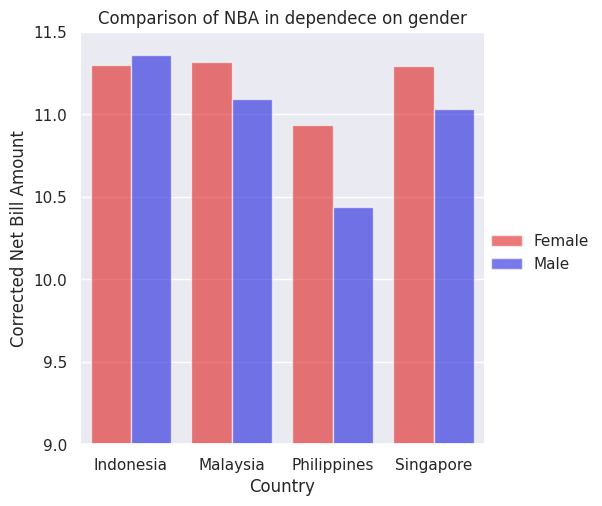

In [74]:
sns.set(style='darkgrid')
gen = sns.catplot(
      data=df, kind='bar',
      x='Country', y='Corrected Net Bill Amount', hue='Gender', 
      errorbar=None, palette={'Male': 'blue', 'Female': 'red'}, 
      height=5, alpha=.6
)

plt.title('Comparison of NBA in dependece on gender')
plt.ylim(9,11.5) #для компактнішої візуалізації та підкреслення різниці між показниками для чоловіків та жінок

gen.despine(left=True)
gen.legend.set_title("")

Бачимо, що тільки у випадку Індонезії середнє значення чистого чеку для чоловіків трошки перевищує це значення для жінок. У інших країнах різниця між чоловіками та жінками помітніша, чоловіки поступаються жінкам, що може вказувати або на те, що середній чек дійсно менший для чоловіків,ніж для жінок, або що через брак даних про чоловіків ми не можемо скласти цілісну картину.

Давайте порахуємо, чи є середні значення чеку для жінок за різними країнами статистично значущо вищі, ніж у чоловіків. 

Приймемо за нульову гіпотезу те, що не має статистично значущої різниці між середніми чеками чоловіків та жінок за різними країнами. Альтернативна ж гіпотеза буде полягати в тому, що середні чеки жінок більші у всіх країнах, ніж у чоловіків.

In [44]:
alpha = 0.05

female_profit = profit_country_gender.loc['Female']
mean_male_profit = profit_country_gender.loc['Male'].mean() #візьмемо середнє для чоловіків за null value

In [45]:
ztest_Score, p_value = ztest(female_profit, value=mean_male_profit, alternative='larger')

In [46]:
if p_value <= alpha:
    print('Fail to accept H0.')
else:
    print('Fail to reject H0.')

Fail to accept H0.


### Дослідимо кількість товарів, яку замовляють клієнти у нашому наборі даних. Для початку подвимося на те, яка кількість товарів в одному замовленні є найбільш популярною.

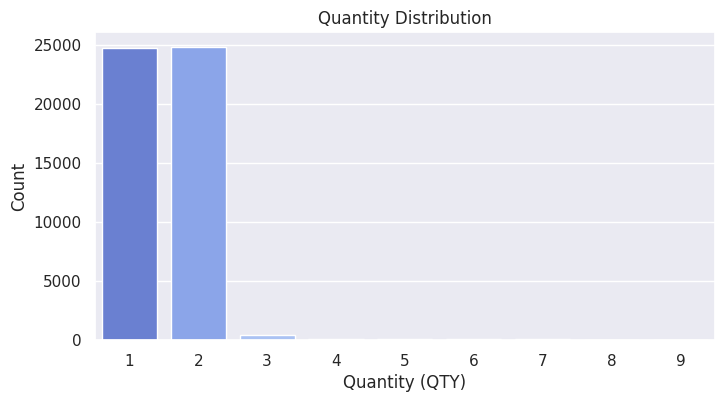

In [79]:
qty_distrib = df.groupby(['QTY'])['QTY'].count().reset_index(name='Count')

sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))
sns.barplot(x='QTY', y='Count', data=qty_distrib, palette="coolwarm")

plt.xlabel('Quantity (QTY)')
plt.ylabel('Count')
plt.title('Quantity Distribution')

plt.show()


Бачимо, ще безумвними лідерами є кількість покупок в один та два товари. 
Давайте тепер подивимося, яка категорія товарів мала сумарно найбільшу кількість замовленних найменувань.

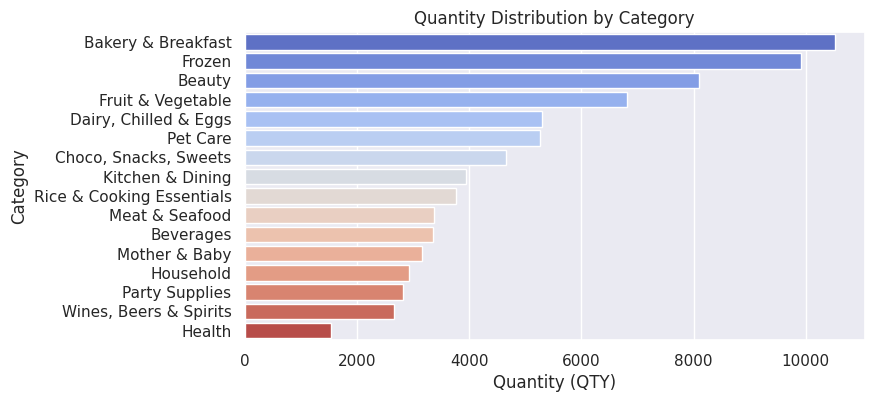

In [48]:
sum_qty_by_category = df.groupby('Category')['QTY'].sum().reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))
sns.barplot(x='QTY', y='Category', 
            data=sum_qty_by_category.sort_values('QTY', ascending=False), 
            palette="coolwarm"
)

plt.xlabel('Quantity (QTY)')
plt.ylabel('Category')
plt.title('Quantity Distribution by Category')

plt.show()

Отже, найбільш чисельною категорією є Bakery & Breakfast з невеликим відривом від Frozen, а найменш - Health.
Але чи є найбільш чисельні категорії одночасно і найбільш прибуктовими? Одночасно подивимося зміну показників QTY та Profit Margin відповідно до статі.

In [49]:
category_population_pyramid_qty = df.groupby(['Category', 'Gender'])['QTY'].sum().reset_index()
category_population_pyramid_profit = df.groupby(['Category', 'Gender'])['Profit Margin'].sum().reset_index()

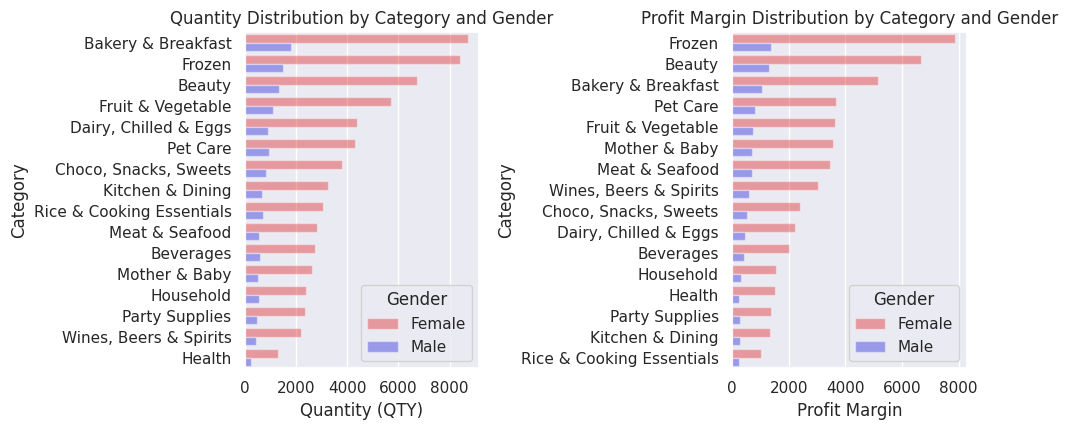

In [171]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
sns.barplot(data=category_population_pyramid_qty.sort_values('QTY', ascending=False),
            x='QTY', y='Category', hue='Gender',
            orient='horizontal', dodge='Faslse', palette={'Male': 'blue', 'Female': 'red'}, alpha=.4
)

plt.xlabel('Quantity (QTY)')
plt.ylabel('Category')
plt.title('Quantity Distribution by Category and Gender');
plt.subplot(2, 2, 2)


sns.barplot(data=category_population_pyramid_profit.sort_values('Profit Margin', ascending=False),
            x='Profit Margin', y='Category', hue='Gender',
            orient='horizontal', dodge='Faslse', palette={'Male': 'blue', 'Female': 'red'}, alpha=.4
)

plt.xlabel('Profit Margin')
plt.ylabel('Category')
plt.title('Profit Margin Distribution by Category and Gender')
plt.tight_layout();

Тепер ми маємо трішки іншу ситуацію. У трійку лідерів за прибутковістю, як і у випадку з кількістю товарів, входять Frozen, Beaty i Bakery & Breakfest, а от найменш прибуткові категорії (особливо Rice & Cooking Essentials i Kitchen & Dining) замовляються достатньо часто (вони знаходяться практично по середині минулого графіку). Лише Party Supplies в обох графіках займає однаково третє знизу місце - як за прибутковістю, так і за кількістю товарів.
Таким чином, треба звернути увагу на Rice & Cooking Essentials i Kitchen & Dining, які є популярними серед клієнтів (було замовлено велику кількість цих товарів), але вони не є прибутковими. 

Пропоную подивитися частоту покупок за цими категоріями за різними роками.

In [51]:
max_profit_category = (
    df
    [df.Category == 'Frozen']
    .groupby('Date')
    .Category
    .count()
) 

min_profit_category = (
    df
    [df.Category == 'Rice & Cooking Essentials']
    .groupby('Date')
    .Category
    .count()
)     

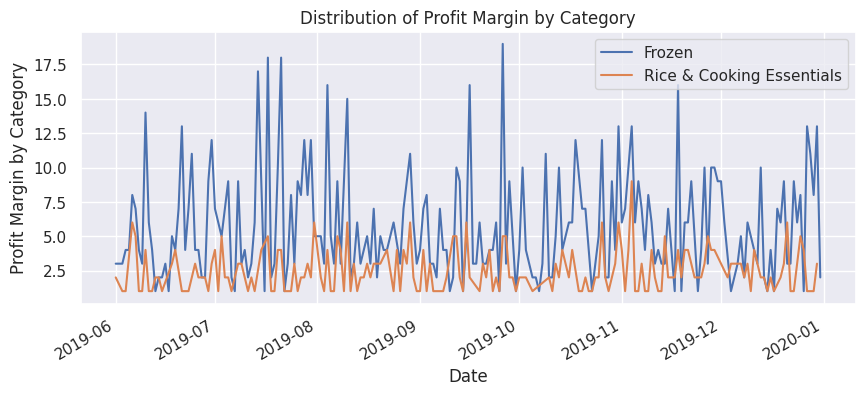

In [84]:
plt.figure(figsize=(10,4))
start_date = pd.to_datetime('2019-06-01')
max_profit_category[max_profit_category.index >= start_date].plot(label='Frozen')
min_profit_category[min_profit_category.index >= start_date].plot(label='Rice & Cooking Essentials')

plt.title('Distribution of Profit Margin by Category')
plt.ylabel('Profit Margin by Category')
plt.legend();

За останні піроку для категорії Rice & Cooking Essentials ми не мали серйозних аномальних змін, лише періодичність, яка може бути пов'язана з місячніми змінами або несезонними факторами. Для порівняння можна подивитися на розподіл за часом для найбільш прибуткової категорії - ми бачимо, що зовнішій вигляд кривих дуже схожий, єдина різниця полягає у тому, що у категорії Frozen досягаються значно вищі значення профіту.

Тому слід звернути на інші аспекти, які можуть впливати на низьку пробутковість цієї категорії, або зібрати більше специфічної інформації для неї.

### Давайте ще повидимося, яка в нас є залежність між профітом та собівартістю для кожного окремого замовлення. 

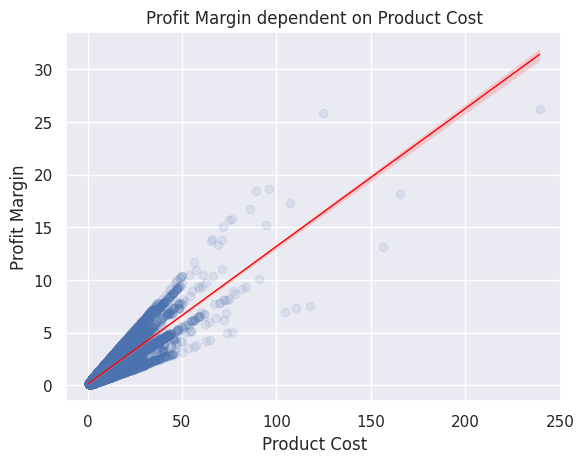

In [53]:
sns.regplot(data=df, x='Product Cost', y='Profit Margin', line_kws={'color':'red', 'linewidth':1}, scatter_kws={'alpha':0.1});
plt.title('Profit Margin dependent on Product Cost');

За графіком можна побачити, що ми маємо сильну позитивну кореляцію між цими параметрами, що означає, що з ростом собівартості (наприклад, коли ми поліпшуємо товар, робимо його більш якісним, що може призвести до зростання витрат на його виготовлення). Окрім того, дані скупчуються сильніше до кореляційної лінії у нижньому лівому кутку, де ми маємо невеликі собівартості та профіти, що свідчить про ще сильнішу кореляцію саме на цій ділянцію З ростом собівартості ми бачимо, що профіт може відхилятися від лінії, хоча і незначно. Тобто прогнозувати його стане трішки складніше, ніж при низьких собівартостях.

Щоб оцінити кореляцію чисельно, можна порахувати коефіцієнт Пірсона. Близкість його значення до 1 свідчить про сильну позитивну кореляцію.

In [54]:
correlation_coefficient, _ = pearsonr(df['Product Cost'],df['Profit Margin'])
print(f"Pearson's Correlation Coefficient: {correlation_coefficient:.3f}")

Pearson's Correlation Coefficient: 0.879


Наш коефіцієнт дійсно достатньо близький до 1, що підтверджує ще раз наше припущення.

### Подивимося, на частоту використання різних способів оплати у різних банках. Це може допомогти зорієнтувати наших клієнтів, якщо виникнуть складнощі в оплаті або вони будуть надават перевагу певному способу/оплаті у певному банку.

In [148]:
popular_payment_mode = (df.groupby('Payment Mode')
                        [['Bank Name', 'Payment Mode']]
                        .value_counts()
                        .reset_index(name='Count'))

In [149]:
popular_payment_mode.head()

,Payment Mode,Bank Name,Count
0,Card,BDO Unibank,3609
1,Card,Philippine Veterans Bank,3488
2,Card,ING Bank,3453
3,Card,Enterprise Bank,3322
4,Card,Philippine National bank,3173


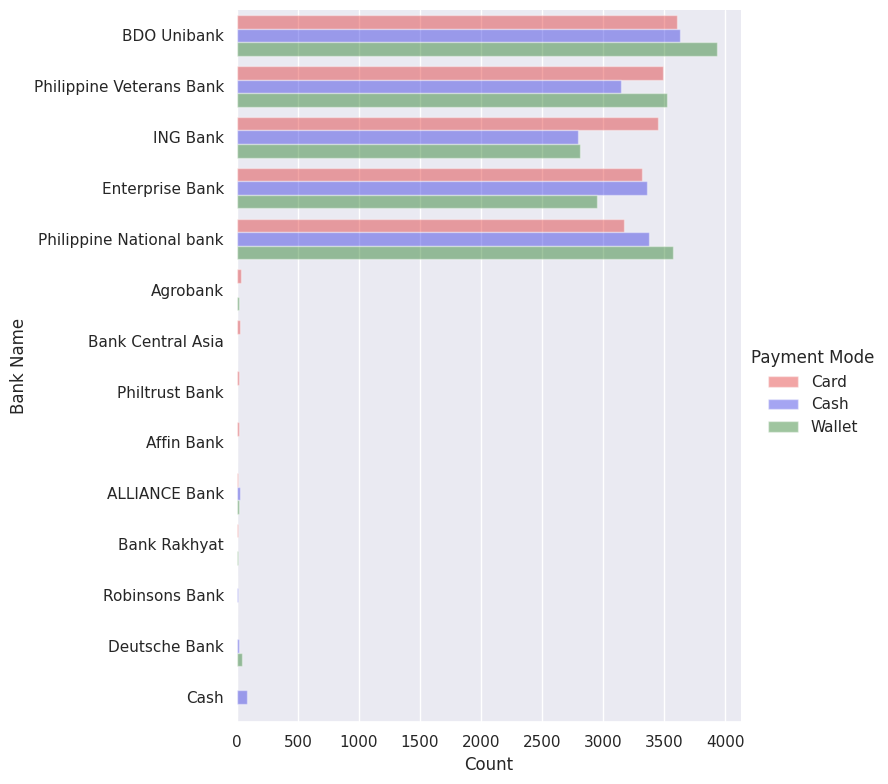

In [174]:
bank = sns.catplot(
    data=popular_payment_mode, kind='bar',
    x='Count', y='Bank Name',
    hue='Payment Mode', height=8, alpha=.4,
    palette={'Cash': 'blue', 'Card': 'red', 'Wallet': 'green'}
    )

bank.despine(left=True)

plt.show()

Серед всього списку банків є кілька, що явно лідують по всім видам оплати. Імовірніше за все, через ці банки було проведено найбільшу кількість покупок.